# Austin Micromobility
-  In April of 2018, California-based Bird Rides Inc launched serveral electric-powered rental scooters onto Austin streets 
-  Since then "dockless micromobility" has taken the city by storm with ten different competitors entering the space including companies like Uber and Lyft
-  According to thedrive.com, Austin's scooter population reached nearly 9,000 scooters during SXSW this past week
- The City of Austin publically provides data on these scooter trips via https://austintexas.gov/docklessmobility
- With this dataset I looked to dive into how people were using these electric scoooters

## Import Packages

In [2]:
import folium
from folium.plugins import HeatMap
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns


%matplotlib inline

#Extends viewing options in pandas
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

#This line of code makes it so that Jupyter displays all outputs instead of just the last command
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

#This line of code supresses scientific notation in my dataframes so it's more readable
pd.options.display.float_format = '{:.4f}'.format

## Import Data

In [3]:
df = pd.read_csv('D:Dockless_Vehicle_Trips.csv', low_memory = False)

## Preliminary EDA

In [4]:
df.head(100)

,ID,Device ID,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Month,Hour,Day of Week,Council District (Start),Council District (End),Origin Cell ID,Destination Cell ID,Year,Start Latitude,Start Longitude,End Latitude,End Longitude
0,000000cb-78a9-4b95-8ead-37c797abcf37,ad14e63b-940d-4ca3-84c6-0131147fba45,scooter,358.0000,915.0000,06/29/2018 05:30:00 PM,06/29/2018 05:30:00 PM,12/12/2018 09:36:14 PM,6.0000,17.0000,5.0000,5.0000,9.0000,013445,013916,2018.0000,30.2630,-97.7620,30.2590,-97.7540
1,00001b5f-46aa-4b26-a12f-d7b4d3c69834,c5a230c9-7e80-4464-862f-f2b23f61d6d3,scooter,226.0000,839.0000,11/30/2018 11:00:00 AM,11/30/2018 11:00:00 AM,12/13/2018 03:43:44 PM,11.0000,11.0000,5.0000,9.0000,9.0000,014556,015186,2018.0000,30.2830,-97.7450,30.2840,-97.7370
2,00002334-2f2b-41a0-9a04-8ff66be39f40,5a9f7815-bf0c-4fef-8bac-60efd4f23b10,scooter,324.0000,1206.0000,10/02/2018 03:15:00 PM,10/02/2018 03:30:00 PM,12/13/2018 03:49:54 PM,10.0000,15.0000,2.0000,9.0000,9.0000,015344,015032,2018.0000,30.2850,-97.7340,30.2910,-97.7380
3,0000261e-c0f0-4fb1-9947-1606dfe4ddcf,41fa0cf0-f433-4b3a-89f5-2c6cec6c367d,scooter,1096.0000,0.0000,09/02/2018 04:45:00 PM,09/02/2018 05:00:00 PM,12/13/2018 03:53:09 PM,9.0000,16.0000,0.0000,9.0000,9.0000,014707,014081,2018.0000,30.2680,-97.7430,30.2760,-97.7520
4,00002c70-678b-4c09-a32c-da0266e329c6,ddd4bbc3-114e-4cbc-b078-860e3c28b11b,scooter,408.0000,1144.0000,09/28/2018 11:45:00 AM,09/28/2018 11:45:00 AM,12/12/2018 10:24:56 PM,9.0000,11.0000,5.0000,3.0000,3.0000,016114,015642,2018.0000,30.2420,-97.7210,30.2440,-97.7290
5,00002f2a-0bcd-4446-bb39-df9fd62be813,d7f470bf-8f4f-4a07-bed7-1f091014920f,scooter,1094.0000,2631.0000,07/22/2018 04:30:00 PM,07/22/2018 04:45:00 PM,12/13/2018 03:48:03 PM,7.0000,16.0000,0.0000,9.0000,5.0000,014546,013602,2018.0000,30.2600,-97.7460,30.2620,-97.7610
6,00003324-85b7-45d0-ada2-31a5db5560fe,90ac0762-d7ee-4d4e-a639-79c387f17f7a,scooter,705.0000,1248.0000,10/28/2018 09:30:00 AM,10/28/2018 09:45:00 AM,12/13/2018 03:53:38 PM,10.0000,9.0000,0.0000,1.0000,9.0000,014867,014870,2018.0000,30.2740,-97.7400,30.2810,-97.7410
7,00003584-6e34-4ccc-9968-b1ae3f47b1d7,029f8342-0a39-463e-9f12-fafb1e953fbb,scooter,143.0000,702.0000,10/08/2018 05:45:00 PM,10/08/2018 05:45:00 PM,12/13/2018 03:46:10 PM,10.0000,17.0000,1.0000,9.0000,9.0000,014401,014560,2018.0000,30.2890,-97.7470,30.2930,-97.7450
8,0000485a-1622-4fed-8fbd-f255552a882e,cef838d6-29a5-46d2-bf29-4e43f19a9394,scooter,215.0000,180.0000,06/16/2018 10:00:00 PM,06/16/2018 10:00:00 PM,12/13/2018 03:43:45 PM,6.0000,22.0000,6.0000,9.0000,9.0000,014707,014707,2018.0000,30.2680,-97.7440,30.2670,-97.7440
9,00004fe9-fdb2-4b55-ab44-789beba2d1d9,22e6237d-544a-4885-8398-28379b89c852,scooter,197.0000,530.0000,10/25/2018 10:45:00 AM,10/25/2018 11:00:00 AM,12/13/2018 03:37:10 PM,10.0000,10.0000,4.0000,9.0000,9.0000,014548,014234,2018.0000,30.2650,-97.7460,30.2670,-97.7520


In [5]:
df.shape

(3219464, 20)

In [6]:
df.columns

Index(['ID', 'Device ID', 'Vehicle Type', 'Trip Duration', 'Trip Distance',
       'Start Time', 'End Time', 'Modified Date', 'Month', 'Hour',
       'Day of Week', 'Council District (Start)', 'Council District (End)',
       'Origin Cell ID', 'Destination Cell ID', 'Year', 'Start Latitude',
       'Start Longitude', 'End Latitude', 'End Longitude'],
      dtype='object')

In [7]:
df.dtypes

ID                           object
Device ID                    object
Vehicle Type                 object
Trip Duration               float64
Trip Distance               float64
Start Time                   object
End Time                     object
Modified Date                object
Month                       float64
Hour                        float64
Day of Week                 float64
Council District (Start)    float64
Council District (End)      float64
Origin Cell ID               object
Destination Cell ID          object
Year                        float64
Start Latitude              float64
Start Longitude             float64
End Latitude                float64
End Longitude               float64
dtype: object

In [8]:
#Convert the seconds to minutes and meters to mi

df['Trip Duration'] = df['Trip Duration']/60
df['Trip Distance'] = df['Trip Distance']*0.00062137

In [9]:
#Check for Nulls
df.isnull().sum(axis = 0)

ID                              0
Device ID                       0
Vehicle Type                    1
Trip Duration                   1
Trip Distance                   1
Start Time                      1
End Time                        1
Modified Date                   0
Month                           1
Hour                            1
Day of Week                     1
Council District (Start)       31
Council District (End)         31
Origin Cell ID               2088
Destination Cell ID          2088
Year                            1
Start Latitude              32684
Start Longitude             32684
End Latitude                21812
End Longitude               21812
dtype: int64

In [10]:
#Nulls are around 1% of the data so I am going to drop them

df.dropna(axis = 0, how = 'any', inplace = True)
df.isnull().sum(axis = 0)

ID                          0
Device ID                   0
Vehicle Type                0
Trip Duration               0
Trip Distance               0
Start Time                  0
End Time                    0
Modified Date               0
Month                       0
Hour                        0
Day of Week                 0
Council District (Start)    0
Council District (End)      0
Origin Cell ID              0
Destination Cell ID         0
Year                        0
Start Latitude              0
Start Longitude             0
End Latitude                0
End Longitude               0
dtype: int64

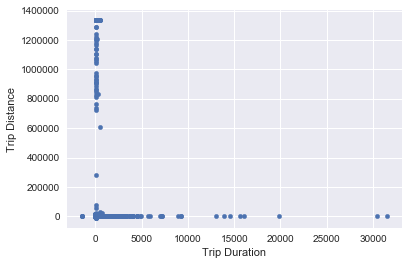

In [11]:
#There are some obvious outliers in the data
df.plot(kind = 'scatter', x = 'Trip Duration', y = 'Trip Distance');

In [12]:
df.describe()

,Trip Duration,Trip Distance,Month,Hour,Day of Week,Council District (Start),Council District (End),Year,Start Latitude,Start Longitude,End Latitude,End Longitude
count,3172769.0000,3172769.0000,3172769.0000,3172769.0000,3172769.0000,3172769.0000,3172769.0000,3172769.0000,3172769.0000,3172769.0000,3172769.0000,3172769.0000
mean,10.8923,25.2897,7.3512,14.4668,3.1713,7.8083,7.7304,2018.2897,30.2003,-97.4956,30.1996,-97.4901
std,41.8069,5289.4219,3.8272,4.5025,2.0797,2.5373,2.6049,0.4536,1.4809,5.0396,1.5293,5.1154
min,-1436.0167,-10391.8577,1.0000,0.0000,0.0000,0.0000,0.0000,2018.0000,0.0000,-122.6820,-97.7490,-122.6750
25%,3.6667,0.2256,3.0000,12.0000,1.0000,9.0000,9.0000,2018.0000,30.2630,-97.7470,30.2630,-97.7470
50%,6.4000,0.5574,9.0000,15.0000,3.0000,9.0000,9.0000,2018.0000,30.2680,-97.7420,30.2680,-97.7410
75%,12.3667,1.0787,10.0000,18.0000,5.0000,9.0000,9.0000,2019.0000,30.2850,-97.7370,30.2850,-97.7370
max,31478.2500,1334381.9137,12.0000,23.0000,6.0000,10.0000,10.0000,2019.0000,82.2880,114.1320,52.2390,175.0340


In [13]:
#You can't have a negative distance and duration so I'm dropping those rows
df = df[(df['Trip Duration'] >= 0) & (df['Trip Distance'] >= 0)]

In [14]:
#Function to remove outliers

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

#Run it through twice to remove outliers in the two columns I want
x = remove_outlier(df, 'Trip Distance')
mm_df = remove_outlier(x,'Trip Duration')


In [15]:
#Data ready for analysis with outliers taken out
mm_df.describe() 

,Trip Duration,Trip Distance,Month,Hour,Day of Week,Council District (Start),Council District (End),Year,Start Latitude,Start Longitude,End Latitude,End Longitude
count,2747105.0000,2747105.0000,2747105.0000,2747105.0000,2747105.0000,2747105.0000,2747105.0000,2747105.0000,2747105.0000,2747105.0000,2747105.0000,2747105.0000
mean,6.7555,0.5773,7.3545,14.4029,3.1623,7.8638,7.8018,2018.2926,30.2030,-97.5008,30.2027,-97.4951
std,4.6135,0.5091,3.8362,4.5342,2.0428,2.4978,2.5579,0.4549,1.4585,5.0105,1.4966,5.0912
min,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,2018.0000,0.0000,-122.6820,-97.7490,-122.6750
25%,3.3500,0.1777,3.0000,12.0000,1.0000,9.0000,9.0000,2018.0000,30.2640,-97.7460,30.2640,-97.7460
50%,5.5667,0.4735,9.0000,15.0000,3.0000,9.0000,9.0000,2018.0000,30.2690,-97.7420,30.2690,-97.7410
75%,9.1500,0.8475,10.0000,18.0000,5.0000,9.0000,9.0000,2019.0000,30.2850,-97.7370,30.2850,-97.7370
max,21.0333,2.3587,12.0000,23.0000,6.0000,10.0000,10.0000,2019.0000,82.2880,114.1320,52.2390,175.0340


## Initial Analysis

In [16]:
#Comparing aggregate stats of bicycles and scooters

mm_df.groupby('Vehicle Type').agg({'ID':'count','Trip Duration': 'mean', 'Trip Distance': 'mean'})

,ID,Trip Duration,Trip Distance
Vehicle Type,,,
bicycle,50950,8.5578,0.9672
scooter,2696155,6.7214,0.5699


In [17]:
#Convert time fields from objects to datetimes
mm_df["Start Time"] = pd.to_datetime(mm_df["Start Time"])
mm_df["End Time"] = pd.to_datetime(mm_df["End Time"])

C:\Users\seanlim\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\seanlim\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
#Just want to look at records related to scooters
scooter = mm_df[(mm_df['Vehicle Type'] == 'scooter')]

C:\Users\seanlim\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


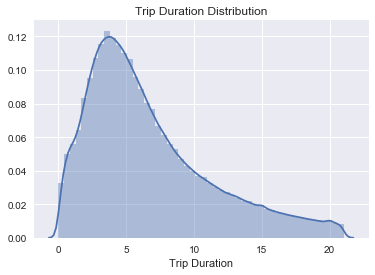

In [19]:
#Distribution of trip duration 

sns.distplot(scooter['Trip Duration']).set_title('Trip Duration Distribution');


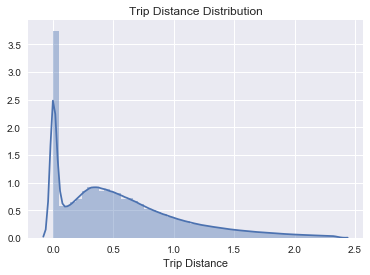

In [20]:
#Distribution of trip distance

sns.distplot(scooter['Trip Distance']).set_title('Trip Distance Distribution');

In [21]:
#group data based on start time aggregated by month

byMonth = scooter['Start Time'].dt.to_period("M")
grph = df.groupby(byMonth)

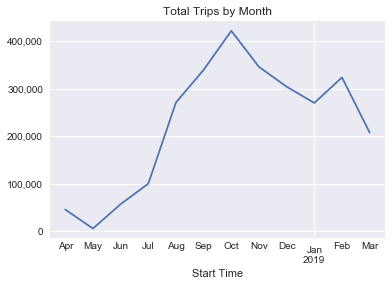

In [22]:
#create graph of total trips taken since launch

plot = grph['ID'].count().plot();
plt.title('Total Trips by Month')

plot.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}')) #Adds commas to y-axis
plt.show();

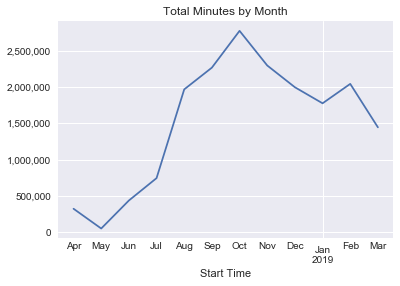

In [23]:
#create graph of total minutes scooted since launch

plot = grph['Trip Duration'].sum().plot()
plt.title('Total Minutes by Month')

plot.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}')) #Adds commas to y-axis
plt.show();

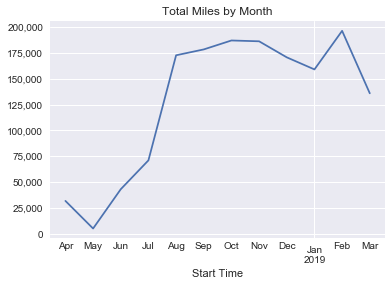

In [24]:
#create graph of total miles scooted since launch

plot = grph['Trip Distance'].sum().plot();
plt.title('Total Miles by Month')

plot.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}')) #Adds commas to y-axis
plt.show();

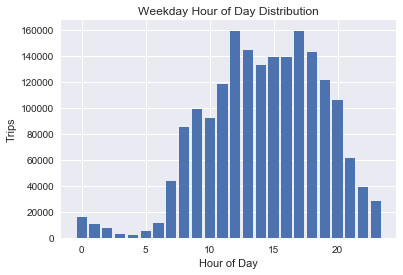

In [28]:
#create a distribution of trips by hour on the weekdays

weekday = scooter[(scooter['Day of Week']>=1) & (scooter['Day of Week']<=5)]
grp_by_hour = weekday.groupby('Hour').count().values[:,0]
plt.title('Weekday Hour of Day Distribution')
plt.bar(range(0,24), grp_by_hour)
plt.xlabel('Hour of Day')
plt.ylabel('Trips')
plt.show();

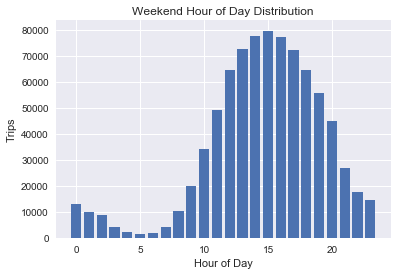

In [29]:
#create a distribution of trips by hour on the weekends

weekend = scooter[(scooter['Day of Week']==0) | (scooter['Day of Week']==6)]
grp_by_hour = weekend.groupby('Hour').count().values[:,0]
plt.title('Weekend Hour of Day Distribution')
plt.bar(range(0,24), grp_by_hour)
plt.xlabel('Hour of Day')
plt.ylabel('Trips')
plt.show();

## Creating a heatmap of trips

To gain deep insight into the data, it would help to understand where these trips are actually occuring in the city 

In [30]:
#initializing map
m = folium.Map([30.2672, -97.7431], zoom_start=21)
m

In [ ]:
from folium import plugins

#make a condensed dataframe to map
heatmap = scooter[(scooter['Month']==2)]

# convert to (n, 2) nd-array format for heatmap
stationArr = scooter[['Start Latitude', 'Start Longitude']].as_matrix()

# plot heatmap
m.add_child(plugins.HeatMap(stationArr, radius=1))
m.save('map.html')

C:\Users\seanlim\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
